# Pymaceuticals Inc.
---

### Analysis Observations:

1. The number of unique mice, we are working on are 248 after removing the redundant data. In reference to the bar chart of mice per drug regimen, there are 10 treatments used for the study. The highest number of mice in the study are treated using Capomulin. while the lowest number of mice in the study are treated using Propriva.Out of which, 51% of population is female vs 49% male.

2. In reference to the box plot across four regimens of interest & summary statistics table, Observing the tumor volumes on last timepoints of mice and comparing four most effective drug regimens on boxplots clearly states that Capomulin and ramicane have performed better as compared to others. No outliers are found on these two. While Infubinol, Ceftamin are slightly less effective and there is one outlier found on infubinol.However,capomulin and ramicane are observed for more timepoints as compared to other drug regimens.

3. Capolmulin was used to treat Mouse ID l509 and line chart depicts thta clearly th tumor volume seems to decrease with time.

4. In reference to the correlation between Capomulin with average weight and final tumor volume, the value is 0.84, meaning that there is a strong positive correlation between the two variables. The r-squared value of 0.71 indicates that the final tumor volume could be predicted by using the average weight of a mouse.
 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results_df = pd.merge(study_results,mouse_metadata, on="Mouse ID")
mouse_results_df.head()

# Display the data table for preview
mouse_results_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
print(mouse_results_df['Mouse ID'].nunique())

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice_id = mouse_results_df.loc[mouse_results_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_id


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data=mouse_results_df.loc[mouse_results_df["Mouse ID"]==duplicate_mice_id[0],:]
duplicate_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = mouse_results_df.drop(duplicate_data.index)
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = cleaned_data['Mouse ID'].nunique()
unique_mice_count


248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean=cleaned_data["Tumor Volume (mm3)"].groupby(cleaned_data["Drug Regimen"]).mean()
median=cleaned_data["Tumor Volume (mm3)"].groupby(cleaned_data["Drug Regimen"]).median()
variance=cleaned_data["Tumor Volume (mm3)"].groupby(cleaned_data["Drug Regimen"]).var()
standard_deviation=cleaned_data["Tumor Volume (mm3)"].groupby(cleaned_data["Drug Regimen"]).std()
SEM=cleaned_data["Tumor Volume (mm3)"].groupby(cleaned_data["Drug Regimen"]).sem()
# Assemble the resulting series into a single summary DataFrame.

stat_table= pd.DataFrame({"Mean Tumor Volume":mean,
                                "Median Tumor Volume":median,
                                "Tumor Volume Variance":variance,
                                "Tumor Volume Std. Dev.":standard_deviation,
                                "Tumor Volume Std. Err. ":SEM})
stat_table




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = cleaned_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

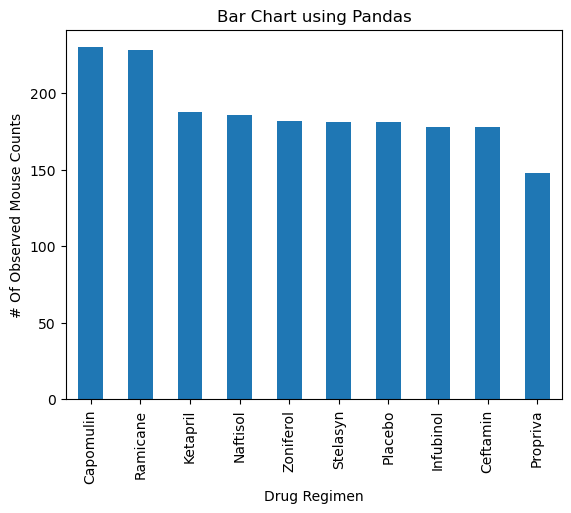

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count =cleaned_data['Drug Regimen'].value_counts()

plot_pandas=mice_count.plot.bar()
plt.title('Bar Chart using Pandas')
plt.xlabel('Drug Regimen')
plt.ylabel('# Of Observed Mouse Counts')
plt.show()

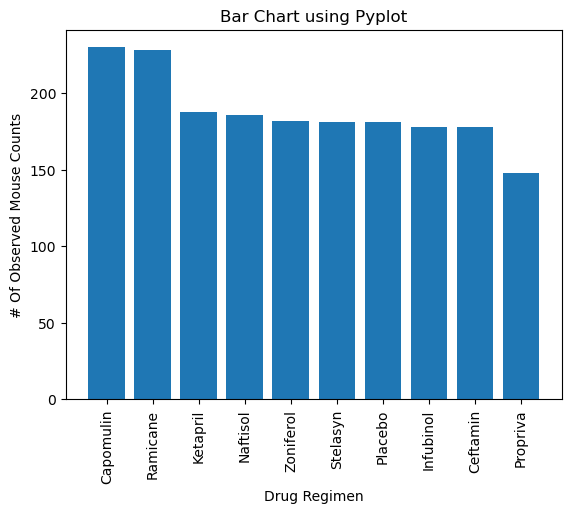

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(mice_count.index.values, mice_count.values)
plt.title('Bar Chart using Pyplot')
plt.xlabel('Drug Regimen')
plt.ylabel('# Of Observed Mouse Counts')
plt.xticks(rotation=90)
plt.show()

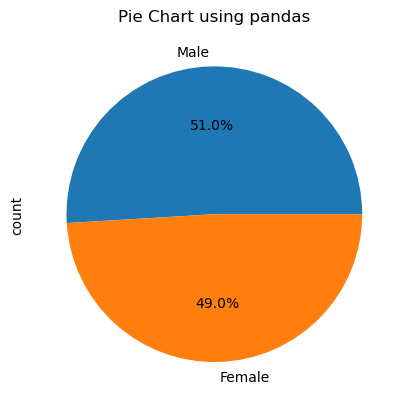

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
plt.title('Pie Chart using pandas')
# Get the unique mice with their gender
mice_sex =cleaned_data['Sex'].value_counts()
mice_sex.plot.pie(autopct= "%1.1f%%")
plt.show()


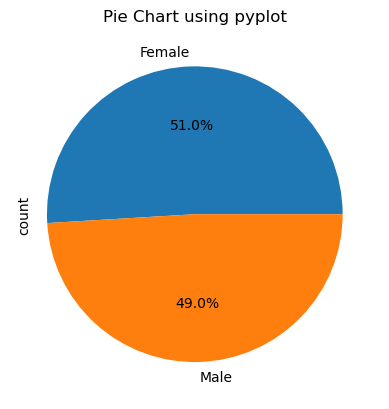

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
mice_sex =cleaned_data['Sex'].value_counts()
labels = ['Female', 'Male']
plt.pie(mice_sex, autopct='%1.1f%%',labels=labels)
plt.title('Pie Chart using pyplot')
plt.text(-1.2, 0, 'count', rotation=90, va='center') # writing y_Axis label on pie_chart
# Make the pie chart
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_values = cleaned_data.groupby( cleaned_data['Mouse ID'])['Timepoint'].max()
max_values
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_timepoint_merge=pd.merge(max_values,cleaned_data, on=("Mouse ID","Timepoint"), how='left')
mouse_timepoint_merge

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_volumes_filtered = mouse_timepoint_merge[mouse_timepoint_merge['Drug Regimen'].isin(treatments)]

# Display the final tumor volumes for each mouse in the selected treatment regimens
print(final_volumes_filtered[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])


    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
238     y769     Ceftamin           68.594745
239     y793    Capomulin           31.896238
240     y865     Ceftamin           64.729837
244     z578     Ramicane           30.638696
245     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [35]:
# Put treatments into a list for for loop (and later for plot labels) #convert numpy array to list
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []
tumor_volumes_by_treatment={}
count=0

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Calculate the first (Q1) and third (Q3) quartiles
# Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatments:
    # Filter the DataFrame for the current treatment
    treatment_data = final_volumes_filtered[final_volumes_filtered['Drug Regimen'] == treatment]
    # Get the tumor volumes for the current treatment
    tumor_volumes = treatment_data['Tumor Volume (mm3)'].tolist()  # Convert to list
    
    # Store the tumor volumes in the dictionary 
    tumor_volumes_by_treatment[treatment] = tumor_volumes

   
    # Calculate Q1, Q3, and IQR
    Q1 = treatment_data['Tumor Volume (mm3)'].quantile(0.25)
    Q3 = treatment_data['Tumor Volume (mm3)'].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) | (treatment_data['Tumor Volume (mm3)'] > upper_bound)]
    if count == 0:
       print(f"------------------------------------------------------------")
    print(f"The lower quartile of {treatment} treatments is: {Q1}")
    print(f"The upper quartile of {treatment} treatments is: {Q3}")
    print(f"The interquartile range of {treatment} treatments is: {IQR}")
    if outliers.empty:
      print(f"no outliers")
    else: 
      print(f"Outliers are")
      print(outliers)
    print(f"------------------------------------------------------------")
    count=count+1


------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.37735684
The upper quartile of Capomulin treatments is: 40.1592203
The interquartile range of Capomulin treatments is: 7.781863460000004
no outliers
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56046955
The upper quartile of Ramicane treatments is: 40.65900627
The interquartile range of Ramicane treatments is: 9.098536719999998
no outliers
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.04860769
The upper quartile of Infubinol treatments is: 65.52574285
The interquartile range of Infubinol treatments is: 11.477135160000003
Outliers are
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
31     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
31  Female          18     

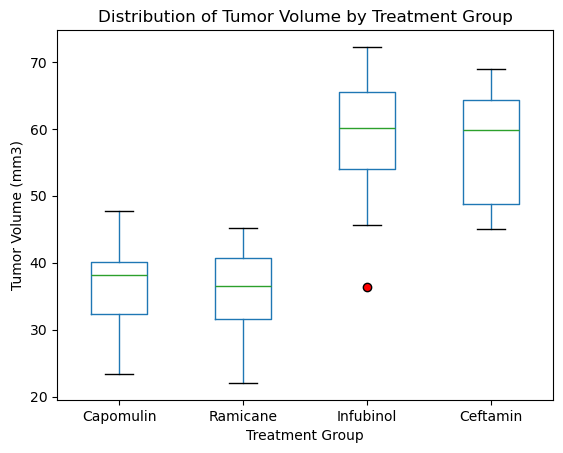

In [24]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_volumes_by_treatment_df= pd.DataFrame.from_dict(tumor_volumes_by_treatment)
tumor_volumes_by_treatment_df.boxplot(flierprops={'markerfacecolor':'r',})
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Treatment Group')
plt.grid(False)
plt.show()


## Line and Scatter Plots

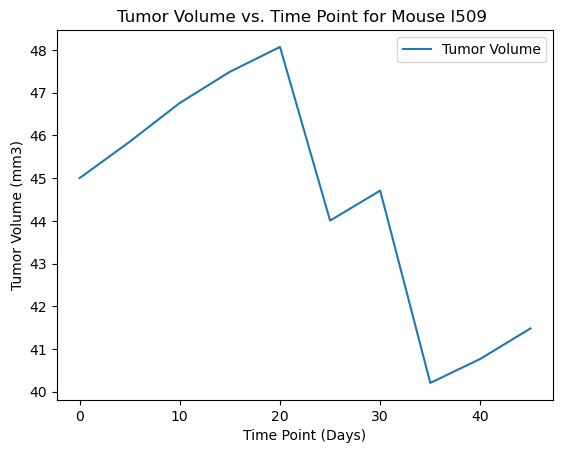

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'  # Example mouse ID
capomulin_data = mouse_results_df[mouse_results_df['Mouse ID'] == mouse_id]

# Create a line plot
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], label='Tumor Volume')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} ')
plt.xlabel('Time Point (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.show()


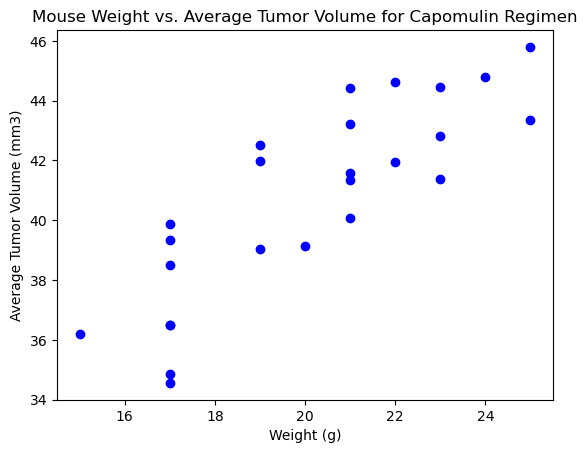

In [37]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data_all = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data_all.groupby('Mouse ID').mean(['Tumor Volume (mm3)']).reset_index()

# Create the scatter plot

plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Slope: 0.9544396890241049, Intercept: 21.552160532685008


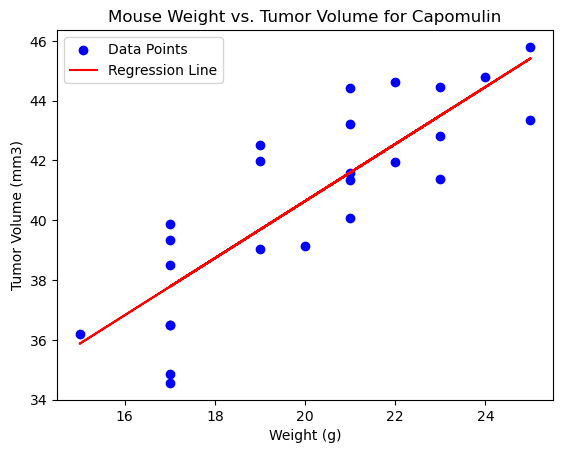

In [23]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

mouse_weight = avg_tumor_volume['Weight (g)']
tumor_volume = avg_tumor_volume['Tumor Volume (mm3)']
correlation_coefficient = mouse_weight.corr(tumor_volume)
correlation_coefficient


slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, tumor_volume)
print(f"Slope: {slope}, Intercept: {intercept}")
regression_line = slope * mouse_weight + intercept

plt.scatter(mouse_weight, tumor_volume, color='blue', label='Data Points')
plt.plot(mouse_weight, regression_line, color='red', label='Regression Line')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Tumor Volume for Capomulin')
plt.legend()
plt.show()